## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

--2025-06-24 07:11:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip.1’

concrete_data_week4 100%[===================>] 249.37M  9.94MB/s    in 18s     

2025-06-24 07:11:42 (14.1 MB/s) - ‘concrete_data_week4.zip.1’ saved [261483817/261483817]



In [3]:
!unzip -q concrete_data_week4.zip

/bin/bash: line 1: unzip: command not found


After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow
import os
import numpy as np
import matplotlib.pyplot as plt

In [19]:
train_batch_size, test_batch_size = 100, 100
image_resize = 224

In [20]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [21]:
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=train_batch_size,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


In [22]:
valid_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=train_batch_size,
    class_mode='categorical')

Found 9501 images belonging to 2 classes.


In [23]:
test_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    batch_size=test_batch_size,
    class_mode='categorical', 
    shuffle=False)

Found 500 images belonging to 2 classes.


In [24]:
len(test_generator[0][0][:5])

5

In [25]:
# test_generator[0][0][:5]

In [ ]:
model = Sequential()
model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.layers

In [ ]:
model.layers[0].layers

In [ ]:
# Freezing VGG16 layers, as we don't want to train them
model.layers[0].trainable = False

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs = 2
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(valid_generator)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1
)

In [ ]:
model.save('classifier_vgg16_model.h5')

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [26]:
vgg_model_path = 'classifier_vgg16_model.h5'
vgg_model = tensorflow.keras.models.load_model(vgg_model_path, compile=False)
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model.summary()

2025-03-08 13:16:41.246432: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,714 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
resnet_model_path = 'classifier_resnet_model.h5'
resnet_model = tensorflow.keras.models.load_model(resnet_model_path)
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [28]:
# Evaluating the model vgg16 on the test data
loss, accuracy = vgg_model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print("Test accuracy using VGG16 model: ", accuracy)

/home/vasim/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-03-08 13:17:00.801060: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1284505600 exceeds 10% of free system memory.
2025-03-08 13:17:01.754689: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1284505600 exceeds 10% of free system memory.
2025-03-08 13:17:05.449616: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 321126400 exceeds 10% of free system memory.
2025-03-08 13:17:05.741730: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 642252800 exceeds 10% of free system memory.
2025-03-08 

5/5 ━━━━━━━━━━━━━━━━━━━━ 150s 30s/step - accuracy: 0.9989 - loss: 0.0147
Test accuracy using VGG16 model:  0.9980000257492065


In [29]:
# Evaluating the model vgg16 on the test data
loss, accuracy = resnet_model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print("Test accuracy using ResNet model: ", accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 62s 12s/step - accuracy: 0.9983 - loss: 0.0044
Test accuracy using ResNet model:  0.9959999918937683


## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:


    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>


Use the following cells to make your predictions.

In [39]:
from tensorflow.keras.activations import softmax, sigmoid

In [30]:
len(test_generator[0][0][:5])

5

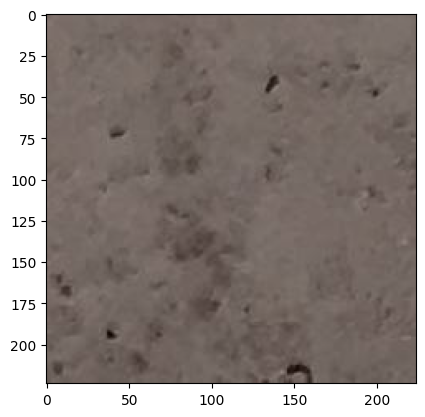

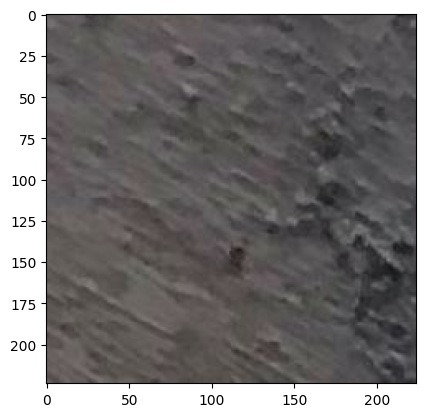

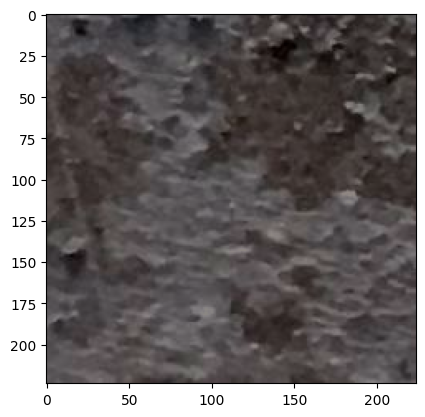

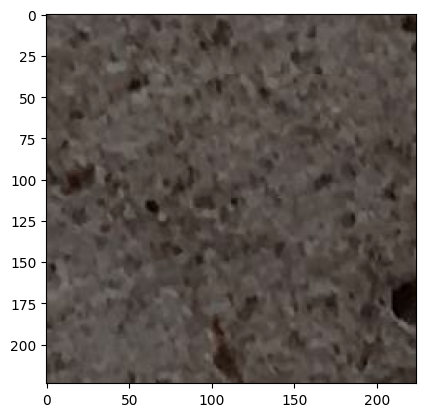

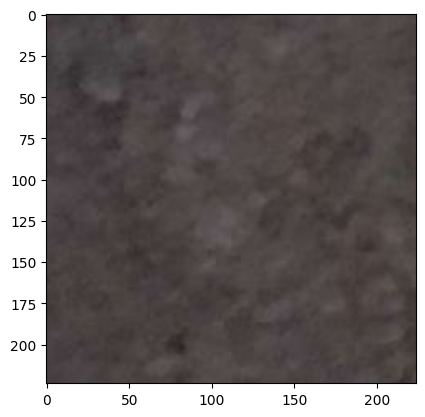

In [48]:
import matplotlib.pyplot as plt

for i, img in enumerate(test_generator[0][0][:5]):
    img = img / 255
    plt.imshow(img)
    plt.show()

In [43]:
vgg_predictions = vgg_model.predict(test_generator[0][0][:5])
vgg_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.99669707, 0.00330299],
       [0.97390795, 0.02609208],
       [0.9155596 , 0.08444035],
       [0.98279494, 0.01720499],
       [0.97812814, 0.02187189]], dtype=float32)

In [44]:
vgg_predictions = softmax(vgg_predictions)
vgg_predictions

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.7297578 , 0.2702422 ],
       [0.72067577, 0.2793243 ],
       [0.6965915 , 0.30340844],
       [0.7242396 , 0.27576038],
       [0.7223716 , 0.27762836]], dtype=float32)>

In [45]:
vgg_label_indices = np.argmax(vgg_predictions, axis=1)
vgg_label_indices

array([0, 0, 0, 0, 0])

In [ ]:
# Define class labels
class_labels = ["Negative", "Positive"]

# Negative: No crack
# Positive: Crack

# Convert indices to labels
vgg_predicted_labels = [class_labels[idx] for idx in vgg_label_indices]
vgg_predicted_labels

['Negative', 'Negative', 'Negative', 'Negative', 'Negative']

In [49]:
resnet_predictions = resnet_model.predict(test_generator[0][0][:5])
resnet_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


array([[9.9972039e-01, 2.7959453e-04],
       [9.9525511e-01, 4.7448617e-03],
       [9.9187332e-01, 8.1266146e-03],
       [9.9866652e-01, 1.3335263e-03],
       [9.9889708e-01, 1.1029537e-03]], dtype=float32)

In [ ]:
resnet_predictions = softmax(resnet_predictions)
resnet_predictions

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.61289924, 0.38710076],
       [0.608581  , 0.39141902],
       [0.5970487 , 0.4029513 ],
       [0.61027753, 0.38972238],
       [0.60938865, 0.39061132]], dtype=float32)>

In [51]:
resnet_label_indices = np.argmax(resnet_predictions, axis=1)
resnet_label_indices

array([0, 0, 0, 0, 0])

In [52]:
# Convert indices to labels
resnet_predicted_labels = [class_labels[idx] for idx in resnet_label_indices]
resnet_predicted_labels

['Negative', 'Negative', 'Negative', 'Negative', 'Negative']

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).